In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus


In [37]:
df=pd.read_csv("/content/drive/My Drive/DataSet/winequality-red.csv",sep = ';')
df.shape

(1599, 12)

We need to conside what is the problem,Linear?Quadratic?or Non_linear ?

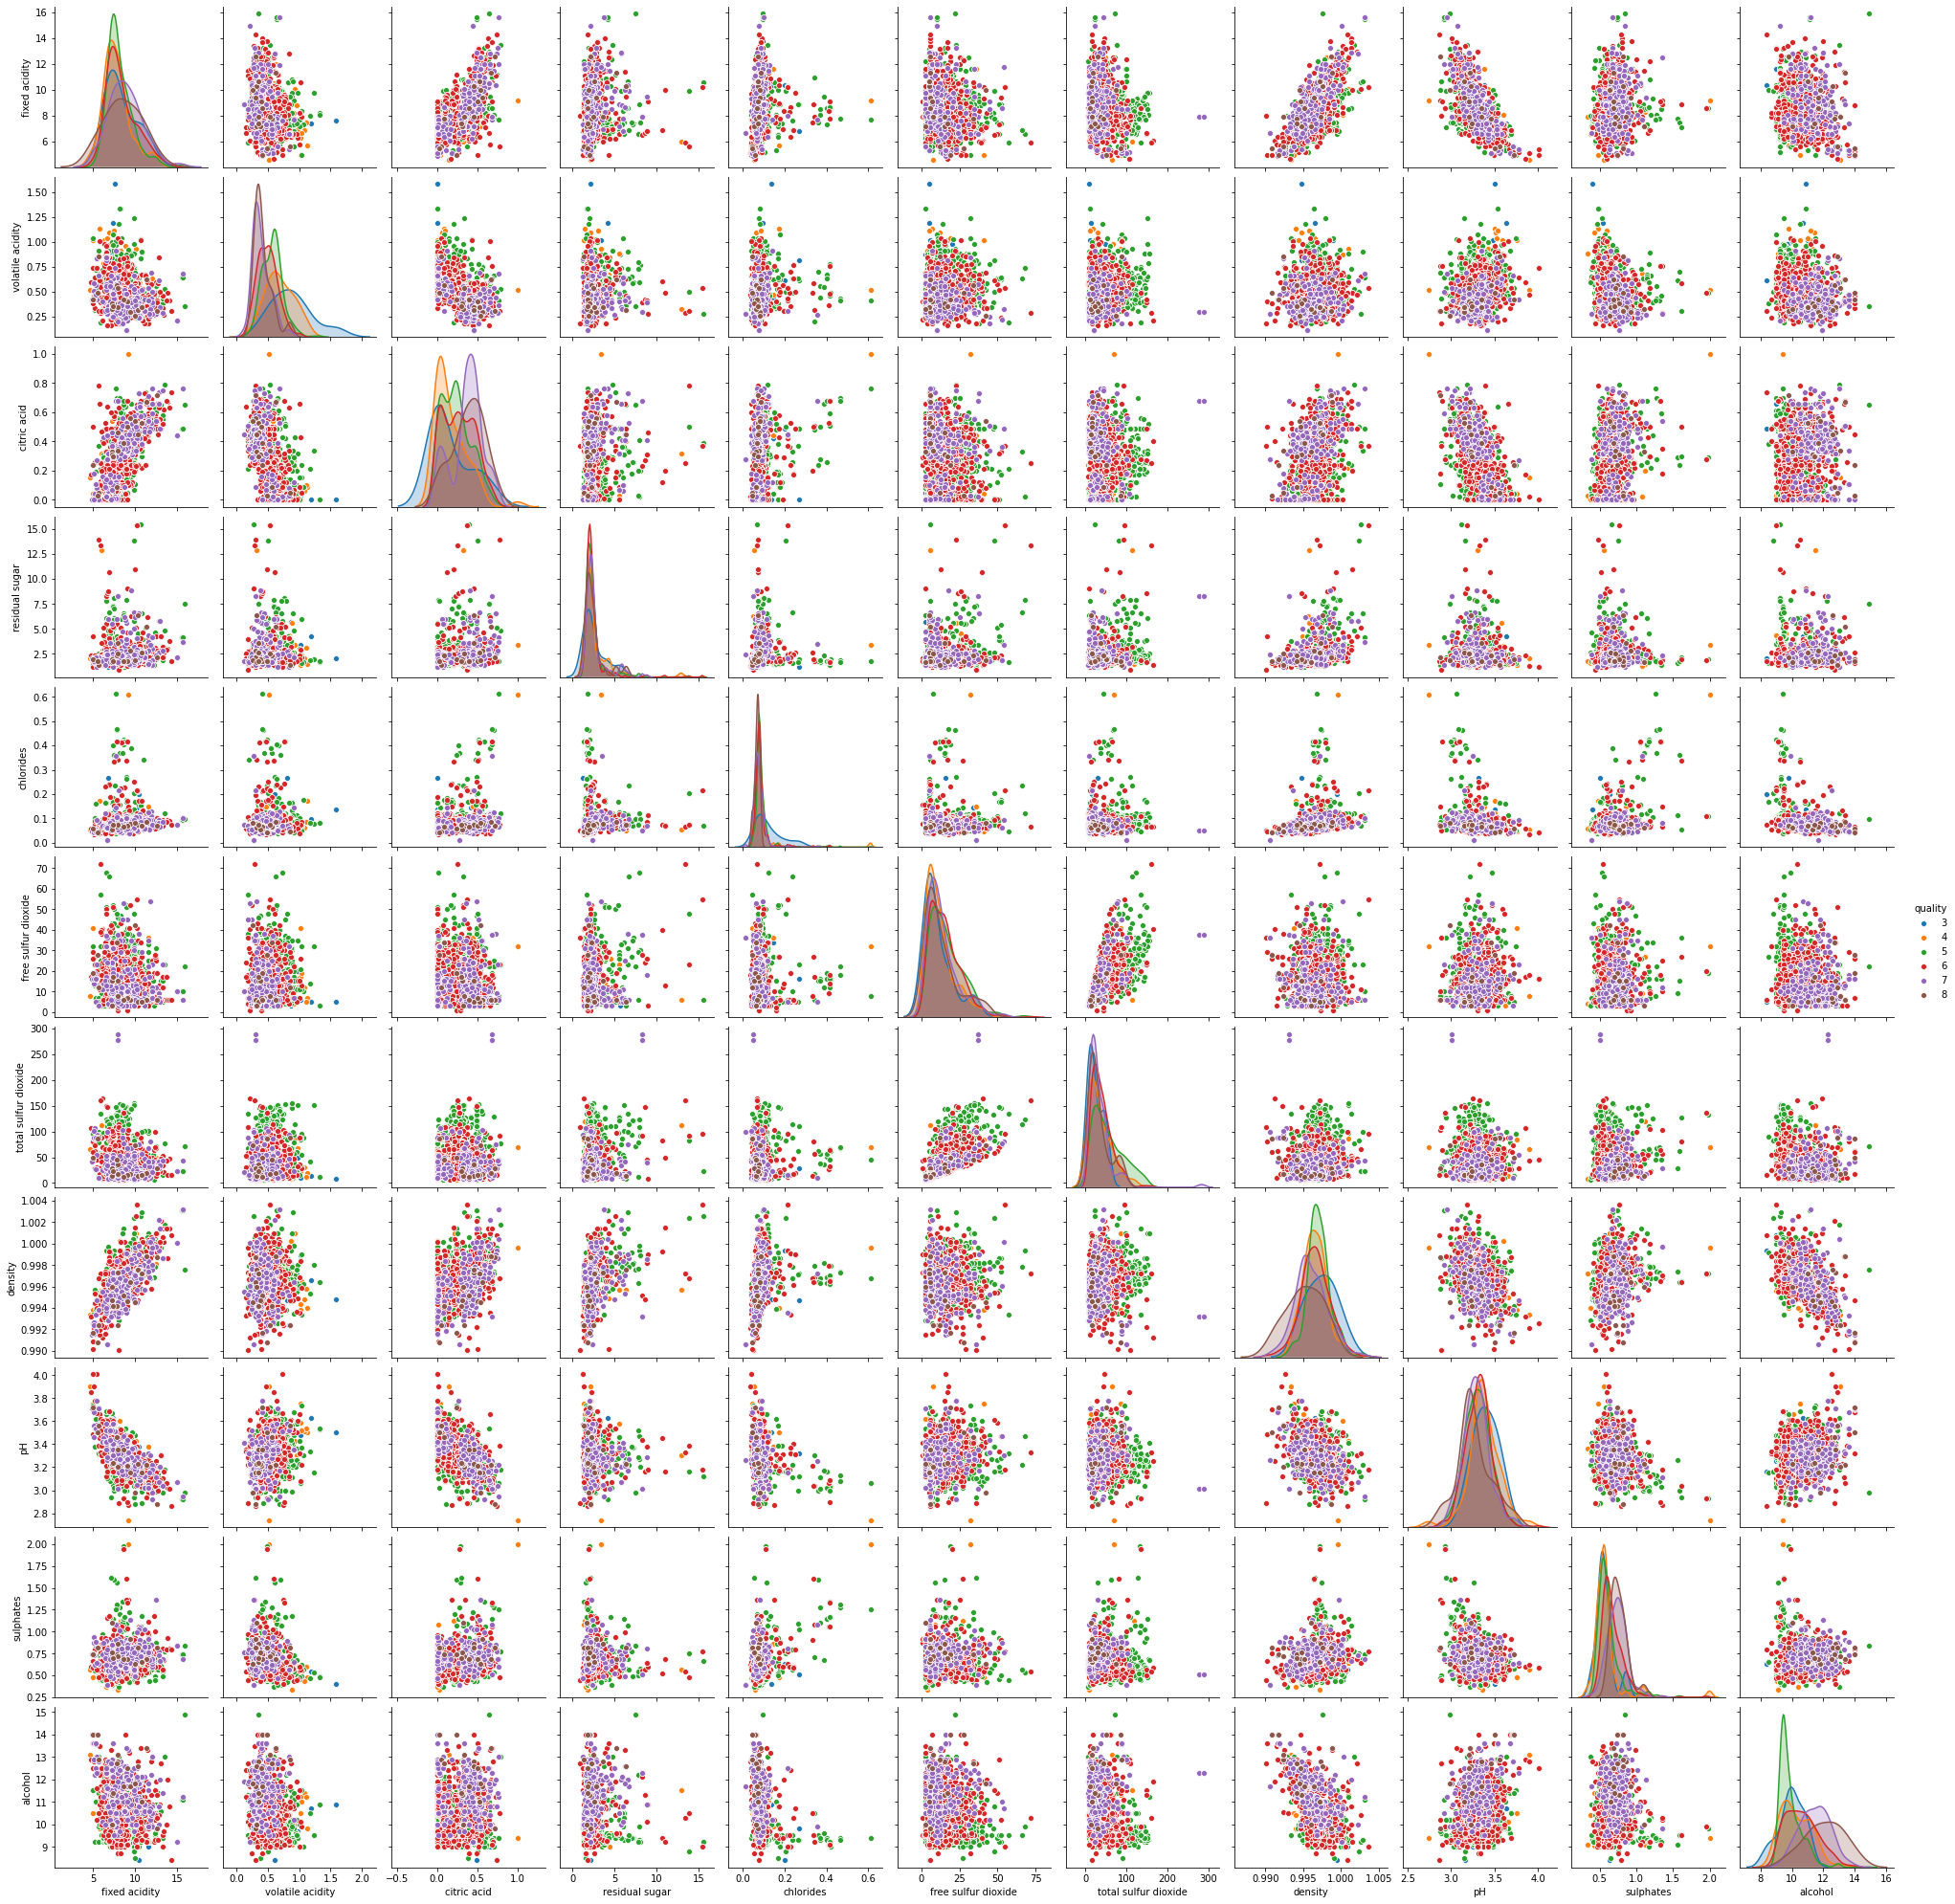

In [21]:
from seaborn import pairplot
pairplot(df,hue='quality')


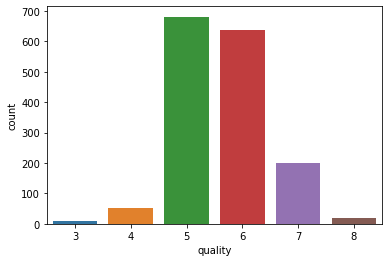

In [22]:
from seaborn import countplot
countplot(df["quality"])
## Inbalance dataset,were going to use the StrafiedKFold

So this is a non linear models , we're not going to use the Logistic,SVM, but we can consider the Ensemble algorithms also KNN,but I think KNN would Fit With this Classification problem ,let see

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold , GridSearchCV
from sklearn.preprocessing import StandardScaler
features = df.drop("quality",axis=1).columns
sc=StandardScaler()
df[features] = pd.DataFrame(sc.fit_transform(df[features]) ,columns = df[features].columns)
features = df[features]
target=df['quality']


Strafied=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
neighbors = np.arange(1,50 ,1)
Models = GridSearchCV(KNeighborsClassifier(),
                        param_grid = neighbors ,
                        cv = Strafied ,
                        verbose = True,
                        n_jobs= -1)

Models.fit(features,target)






AttributeError: ignored

In [45]:
Strafied=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
neighbors = {"n_neighbors" : np.arange(1,50 ,1) }
Models = GridSearchCV(KNeighborsClassifier(,),
                        param_grid = neighbors ,
                        cv = Strafied ,
                        n_jobs= -1)

Models.fit(features,target)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
Models.best_score_

0.6410207680250785

In [53]:
Model_Summary = Models.cv_results_
x=pd.DataFrame(Model_Summary)
x.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008128,0.004245,0.031078,0.001214,1,{'n_neighbors': 1},0.618750,0.653125,0.643750,0.656250,0.633229,0.641021,0.013730,1
1,0.006050,0.000675,0.043221,0.007578,2,{'n_neighbors': 2},0.559375,0.581250,0.603125,0.600000,0.583072,0.585364,0.015667,4
2,0.005964,0.000672,0.037652,0.004188,3,{'n_neighbors': 3},0.562500,0.550000,0.615625,0.600000,0.554859,0.576597,0.026266,31
3,0.005610,0.000269,0.036559,0.000708,4,{'n_neighbors': 4},0.562500,0.578125,0.584375,0.581250,0.589342,0.579118,0.009098,16
4,0.005493,0.000112,0.041921,0.004554,5,{'n_neighbors': 5},0.537500,0.565625,0.565625,0.590625,0.548589,0.561593,0.018027,49


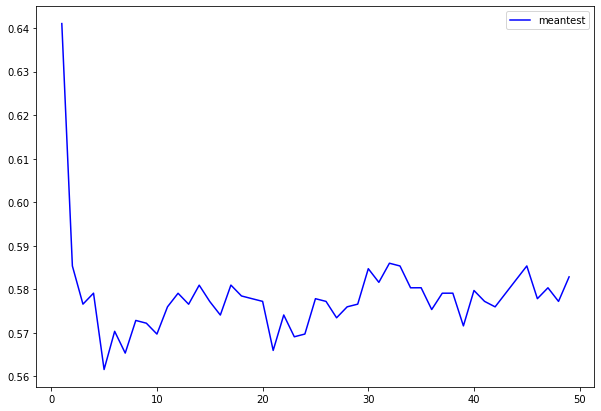

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(x["param_n_neighbors"] , x["mean_test_score"], color='blue' )
# plt.plot(x["param_n_neighbors"] , x["split0_test_score"], color='red' )
# plt.plot(x["param_n_neighbors"] , x["split1_test_score"], color='green' )
# plt.plot(x["param_n_neighbors"] , x["split2_test_score"], color='black' )
# plt.plot(x["param_n_neighbors"] , x["split3_test_score"], color='white' )
# plt.plot(x["param_n_neighbors"] , x["split4_test_score"], color='purple' )
plt.legend(["meantest","split0","split1","split2","split3","split4"],loc='best')
plt.show()

See ? It's Better Right ,so choosing models correctly will save much time , go try use ensemble and logistic see what the output,i bet this one is better
